<h1>Decision Tree model: heart_2

<h4>Pre - processing the Dataset </h4>

1. Read and initial checking of dataset

In [1]:
import pandas as pd

data = pd.read_csv('data/heart_v2.csv')

data.shape

(303, 14)

2. Variable Standardization

- Convert the column names according to <b>heart_1</b> dataset

In [2]:
# convert the column names according to heart_1 dataset

def convert_columns_name(data):

    data.rename(columns={
        'age':'Age', 
        'sex': 'Sex',
        'cp': 'ChestPainType',
        'trtbps': 'RestingBP',
        'chol': 'Cholesterol',
        'fbs': 'FastingBS',
        'restecg': 'RestingECG',
        'thalachh': 'MaxHR',
        'exng': 'ExerciseAngina',
        'oldpeak': 'Oldpeak',
        'slp': 'ST_Slope',
        'output': 'HeartDisease'
    }, inplace=True)

    return data

data = convert_columns_name(data)

In [3]:
#check the information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             303 non-null    int64  
 1   Sex             303 non-null    int64  
 2   ChestPainType   303 non-null    int64  
 3   RestingBP       303 non-null    int64  
 4   Cholesterol     303 non-null    int64  
 5   FastingBS       303 non-null    int64  
 6   RestingECG      303 non-null    int64  
 7   MaxHR           303 non-null    int64  
 8   ExerciseAngina  303 non-null    int64  
 9   Oldpeak         303 non-null    float64
 10  ST_Slope        303 non-null    int64  
 11  caa             303 non-null    int64  
 12  thall           303 non-null    int64  
 13  HeartDisease    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
#check the description
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,caa,thall,HeartDisease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Check the head
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,caa,thall,HeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#check the null values in our dataset
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
caa               0
thall             0
HeartDisease      0
dtype: int64

HeartDisease
1    165
0    138
Name: count, dtype: int64
Total number of samples: 303
Samples for High Risk Heart Disease: 165
Samples for Low Risk Heart Disease: 138
Percentage of High Risk: 54.46%
Percentage of Low Risk: 45.54%


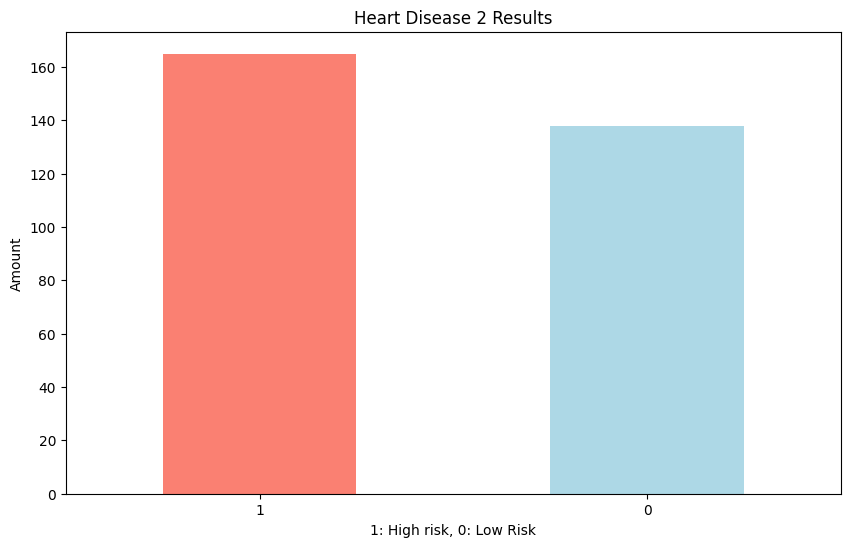

In [7]:
#check the output of the dataset (1: High risk, 0: Low risk)

import matplotlib.pyplot as plt

result = data['HeartDisease'].value_counts()
print(result)

# Calculate the total number of samples
total_samples = len(data['HeartDisease'])

# Calculate the percentage of each class
percentage_high_risk = (result[1] / total_samples) * 100
percentage_low_risk = (result[0] / total_samples) * 100

print("Total number of samples: {}".format(total_samples))
print("Samples for High Risk Heart Disease: {}".format(result[1]))
print("Samples for Low Risk Heart Disease: {}".format(result[0]))

print("Percentage of High Risk: {:.2f}%".format(percentage_high_risk))
print("Percentage of Low Risk: {:.2f}%".format(percentage_low_risk))

data['HeartDisease'].value_counts().plot(kind = 'bar', figsize = (10, 6), color = ['salmon', 'lightblue'])

plt.title("Heart Disease 2 Results")
plt.xlabel("1: High risk, 0: Low Risk")
plt.ylabel("Amount")
plt.xticks(rotation = 0)

plt.savefig("images/heart_disease_2_plot.png")

3. Assign the feature columns to <i>x</i> and target column to <i>y</i>

In [8]:
feature_columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

x = data[feature_columns]
y = data['HeartDisease']

4. Split the data into train and test subset
5. Train the decision tree model with max_depth=3

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

# Create Decision Tree Classifier object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifier
clf = clf.fit(x_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(x_test)

6. Evaluation Score

- Accuracy Score

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

print('Testing Accuracy:', accuracy_score(y_test, y_pred))

Testing Accuracy: 0.7692307692307693


- Classification report (Precision, Recall, f1-score)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72        41
           1       0.75      0.86      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91



- Confusion Matrix

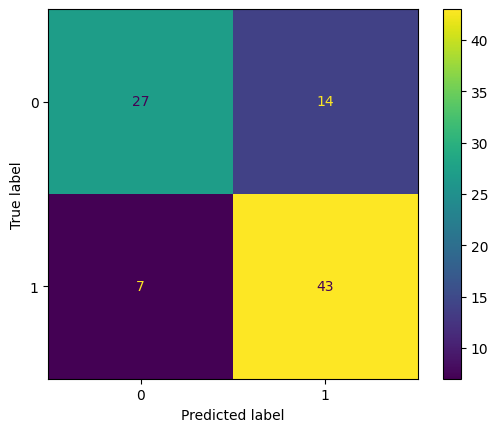

In [12]:
# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(cm)

# Plot the confusion matrix
disp.plot()

- Cross validation score

In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()

0.7460655737704918

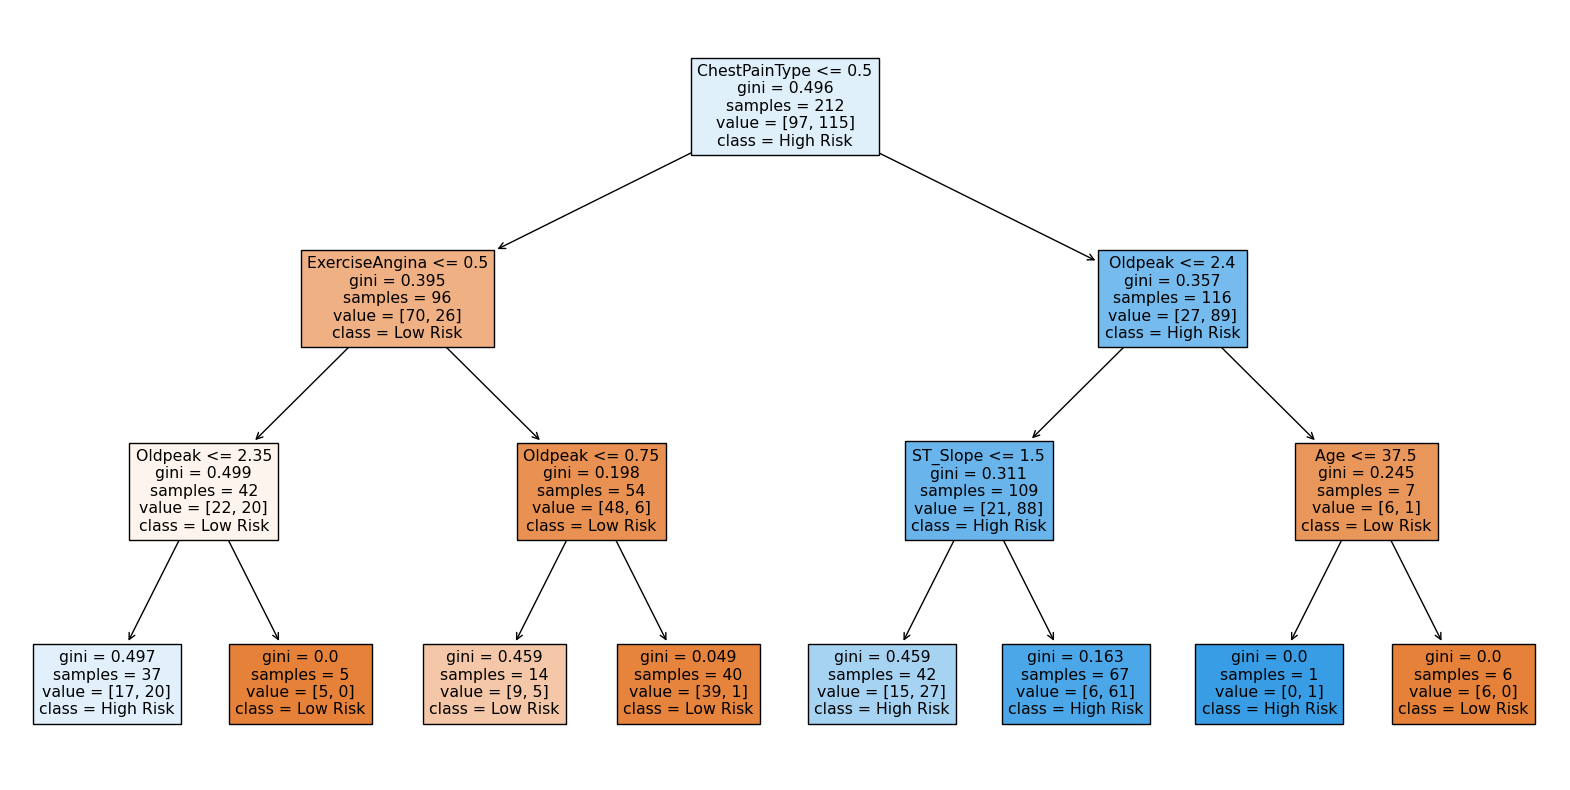

In [14]:
from sklearn.tree import plot_tree

# Plotting decision tree
plt.figure(figsize = (20, 10))
plot_tree(clf, filled = True, feature_names=x.columns.to_list(), class_names=['Low Risk', 'High Risk'])
plt.savefig('Heart Rate Disease Decision-Tree')
plt.show()

In [16]:
df_importance = pd.DataFrame({'Features' : x.columns,'Importances' : clf.feature_importances_}).sort_values('Importances', ascending=False)
df_importance

,Features,Importances
2,ChestPainType,0.536344
9,Oldpeak,0.221071
8,ExerciseAngina,0.130472
10,ST_Slope,0.076597
0,Age,0.035516
1,Sex,0.000000
3,RestingBP,0.000000
4,Cholesterol,0.000000
5,FastingBS,0.000000
6,RestingECG,0.000000


7. Prolog implementation by querying <i>heart.pl</i>

In [17]:
from pyswip import Prolog

prolog = Prolog()

prolog.consult('heart.pl')

data_pl = pd.read_csv('data/heart_v2.csv')

# Convert the categorical columns to numeric
data_pl = convert_columns_name(data_pl)

# Create an empty list to store the result of high cholesterol and high blood pressure
heart_rate_risk = []

for index, row in data_pl.iterrows():
    # Get the cholesterol value from the current row
    cholesterol_value = row['Cholesterol']

    # Get the blood pressure value from the current row
    blood_pressure_value = row['RestingBP']

    # Query the Prolog engine to check if the cholesterol level is above 193 & blood pressure is above 120
    result = bool(list(prolog.query(f"heart_rate_risk({cholesterol_value}, {blood_pressure_value})")))

    # Append 1 or 0 to the high_cholesterol list based on the query result
    heart_rate_risk.append(1 if result else 0)

# Add the high_cholesterol list as a new column in the DataFrame
data_pl['HeartDiseaseProlog'] = heart_rate_risk

# Drop the  'Cholesterol' and 'RestingBP' columns
data_pl.drop(columns=['Cholesterol', 'RestingBP'], inplace = True)

# Show the head of the new DataFrame
data_pl.head()

,Age,Sex,ChestPainType,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,caa,thall,HeartDisease,HeartDiseaseProlog
0,63,1,3,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,0,1,163,1,0.6,2,0,2,1,0


8. Retrained decision tree model

In [18]:
# include 'HeartDiseaseProlog' in the feature columns
feature_columns_pl = ['Age', 'Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDiseaseProlog']

x_pl = data_pl[feature_columns_pl]
y_pl = data_pl['HeartDisease']

In [19]:
x_train_pl, x_test_pl, y_train_pl, y_test_pl = train_test_split(x_pl, y_pl, test_size = 0.3, random_state=42)

In [20]:
# Create Decision Tree Classifier object
model = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifier
model = model.fit(x_train_pl, y_train_pl)

# Predict the response for test dataset
y_pred_pl = model.predict(x_test_pl)

- Accuracy Score

In [21]:
print('Testing Accuracy:', accuracy_score(y_test_pl, y_pred_pl))

Testing Accuracy: 0.7472527472527473


- Classification report (Precision, Recall, f1-score)

In [22]:
print(classification_report(y_test_pl, y_pred_pl))

              precision    recall  f1-score   support

           0       0.78      0.61      0.68        41
           1       0.73      0.86      0.79        50

    accuracy                           0.75        91
   macro avg       0.76      0.73      0.74        91
weighted avg       0.75      0.75      0.74        91



- Confusion Matrix

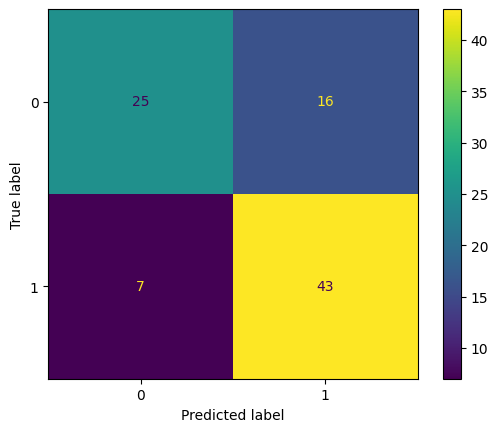

In [23]:
# Confusion Matrix 
cm = confusion_matrix(y_test_pl, y_pred_pl)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(cm)

# Plot the confusion matrix
disp.plot()

- Cross validation score

In [24]:
cross_val_score(model, x_pl, y_pl, cv=5, scoring='accuracy').mean()

0.7494535519125683